![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Keras - Autoencoders**

---

In this lesson, we learn how to build autoencoders in Keras.

Tutorial Credit - https://blog.keras.io/building-autoencoders-in-keras.html 

An autoencoder is an unsupervised machine learning algorithm. In our example here it takes an image as input and then tries to reconstruct that image using less information.

They do this by projecting higher dimensional data to a lower dimension (similar to Principal Component Analysis) by keeping the feautres of most importance. This is called the latent space. 

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/AutoEncoder_kfqad1.png)


### **An Autoencoder is comprised of these two Networks**

**Encoder**: compresses/downsamples the input image into a lesser number of bits. This lesser number of bits is called the latent-space or bottleneck. 

**Decoder**: tries to reconstruct the input using only the encoding of the input. If the decoder can reconstruct the image accurately from the output of the encoder you have a properly functioning encoder (able to produce good encodings) and decoder system.

## **1. Building a Simple Autoencoder**

We'll build a single fully-connected neural layer as encoder and as decoder.



In [1]:
# Import and creating some helper functions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


## **1. Load and preprocess our MNIST Dataset**

#### **We then create a noisy version of our training and test data**

11501568/11490434 [==============================] - 1s 0us/step


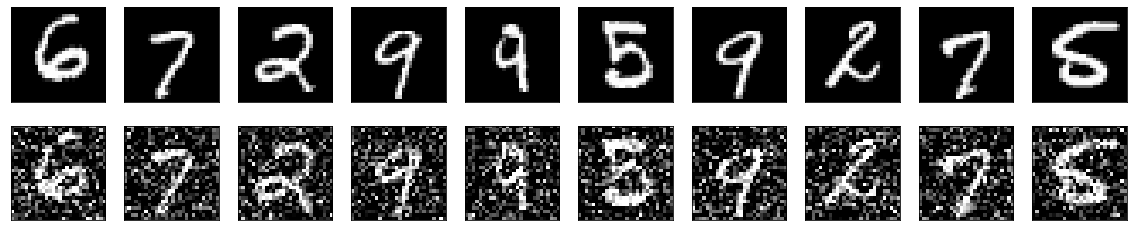

In [2]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## **2. Now let's also create our autoencoder model**


We are going to use the Functional API to build our convolutional autoencoder (this should be familar to PyTorch users).

In [3]:
# Our input shape is 28 x 28 x 1
input = layers.Input(shape=(28, 28, 1))

# The Encoder Model
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# The Decoder Model
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder - Note it is the entire concatenation of the encoder and decoder
autoencoder = Model(input, x)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

## **3. Train our autoencoder** 

We will train our autoencoder using `train_data` as both our input data and target. 

NOTE: We are setting up the validation data using the same format.

In [4]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 12s 7ms/step - loss: 0.1331 - val_loss: 0.0736
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0718 - val_loss: 0.0697
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0694 - val_loss: 0.0683
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0682 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0674 - val_loss: 0.0666
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0668 - val_loss: 0.0662
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0663 - val_loss: 0.0658
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0660 - val_loss: 0.0655
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0654 - val_loss: 0.064

### **4. Get our Autoencoder Predictions**

Now we'll predict on our test dataset and display the original image together with the prediction from our autoencoder.

Notice how close the predictions are to the original image. However if you look closely you can see slight differences.


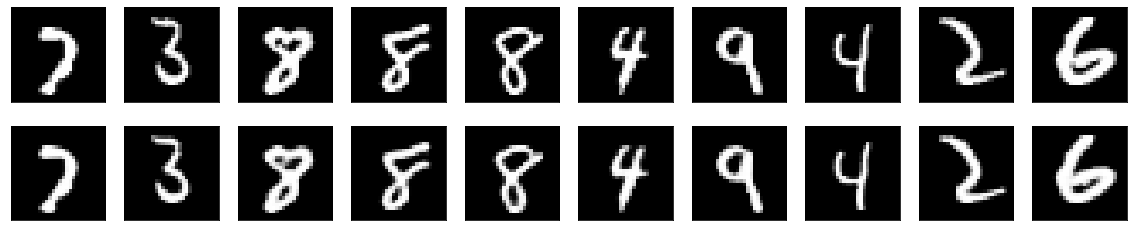

In [5]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

## **5. Now let's use our Autoencoder as a Denoiser**

To do this we'll retrain it using the noisy data as our input and the clean data as our target. This teaches our autoencoder to learn how to denoise the images.

In [6]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1026 - val_loss: 0.0945
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0939 - val_loss: 0.0921
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0921 - val_loss: 0.0908
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0910 - val_loss: 0.0899
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0901 - val_loss: 0.0892
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0895 - val_loss: 0.0887
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0890 - val_loss: 0.0883
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0887 - val_loss: 0.0879
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0883 - val_loss: 0.0877
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0881 - val_loss: 0.0873

## **6. Now let's evaluate it's performance on our noisy Test Data**

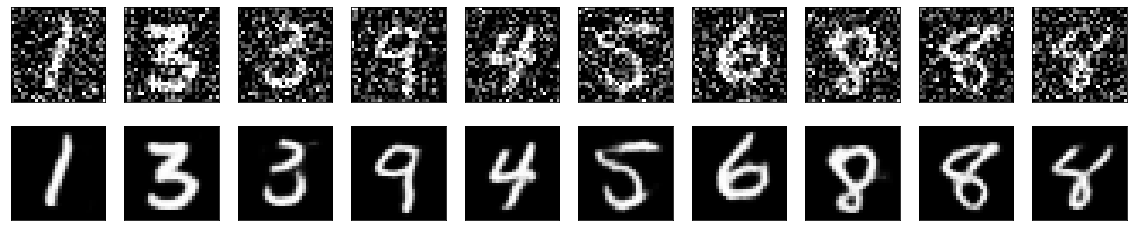

In [7]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)